Autor:  
Manuel Eugenio Morocho Cayamcela, PhD

## Extracción de Patrones con los datos de California Housing Prices

### **Objetivo y alcance del trabajo:**

Esta prueba práctica se centra en el análisis exploratorio de datos y la visualización de un conjunto de datos de viviendas. El conjunto de datos contiene información sobre las características de las viviendas, como la ubicación geográfica, el tamaño, el número de habitaciones, el precio medio y la proximidad al océano.

El objetivo principal de este notebook es entender las relaciones entre las diferentes características de las viviendas. Para ello, realizaremos una serie de tareas, incluyendo la limpieza de los datos, la transformación de variables categóricas en numéricas, el cálculo de correlaciones entre las variables y la visualización de estas correlaciones.

Al final de este notebook, tendremos una mejor comprensión de cómo las diferentes características de las viviendas están relacionadas entre sí, lo que nos permitirá realizar análisis más detallados en el futuro.

El dataset 'california_housing_prices.csv' contiene información sobre los precios de viviendas en California. Las variables presentes en el dataset son las siguientes:

1. longitude: La longitud geográfica de la ubicación de la vivienda.
2. latitude: La latitud geográfica de la ubicación de la vivienda.
3. housing_median_age: La edad mediana de las viviendas en la ubicación.
4. total_rooms: El número total de habitaciones en la vivienda.
5. total_bedrooms: El número total de dormitorios en la vivienda.
6. population: La población total en la ubicación.
7. households: El número total de hogares en la ubicación.
8. median_income: El ingreso mediano de los hogares en la ubicación.
9. median_house_value: El valor mediano de las viviendas en la ubicación.
10. ocean_proximity: La proximidad de la vivienda al océano.

El dataset contiene un total de 20,640 registros. Las variables tienen diferentes tipos de datos, siendo la mayoría variables numéricas (float64) y una variable categórica (object). Algunas variables tienen valores faltantes en el dataset.

### **Fase I:** Carga y análisis exploratorio inicial de los datos

In [1]:
# Importamos las librerías 'pandas' con alias 'pd', 'seaborn' con alias 'sns', y 'matplotlib.pyplot' con alias 'plt'
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargamos el conjunto de datos 'california_housing_prices.csv' en un DataFrame llamado 'housing'
housing = pd.read_csv('D:/Archivos de Usuario/Documents/Artificial-Intelligence/Datasets/california_housing_prices.csv')

In [3]:
# Utilizamos el método 'head()' para visualizar las primeras 15 filas del DataFrame 'housing'
housing.head(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [13]:
# Utilizamos el método 'describe()' para obtener estadísticas descriptivas del DataFrame 'housing'
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [5]:
# Utilizamos el método 'info()' para obtener información sobre el DataFrame 'housing'
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### **Fase II:** Visualización de los datos

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

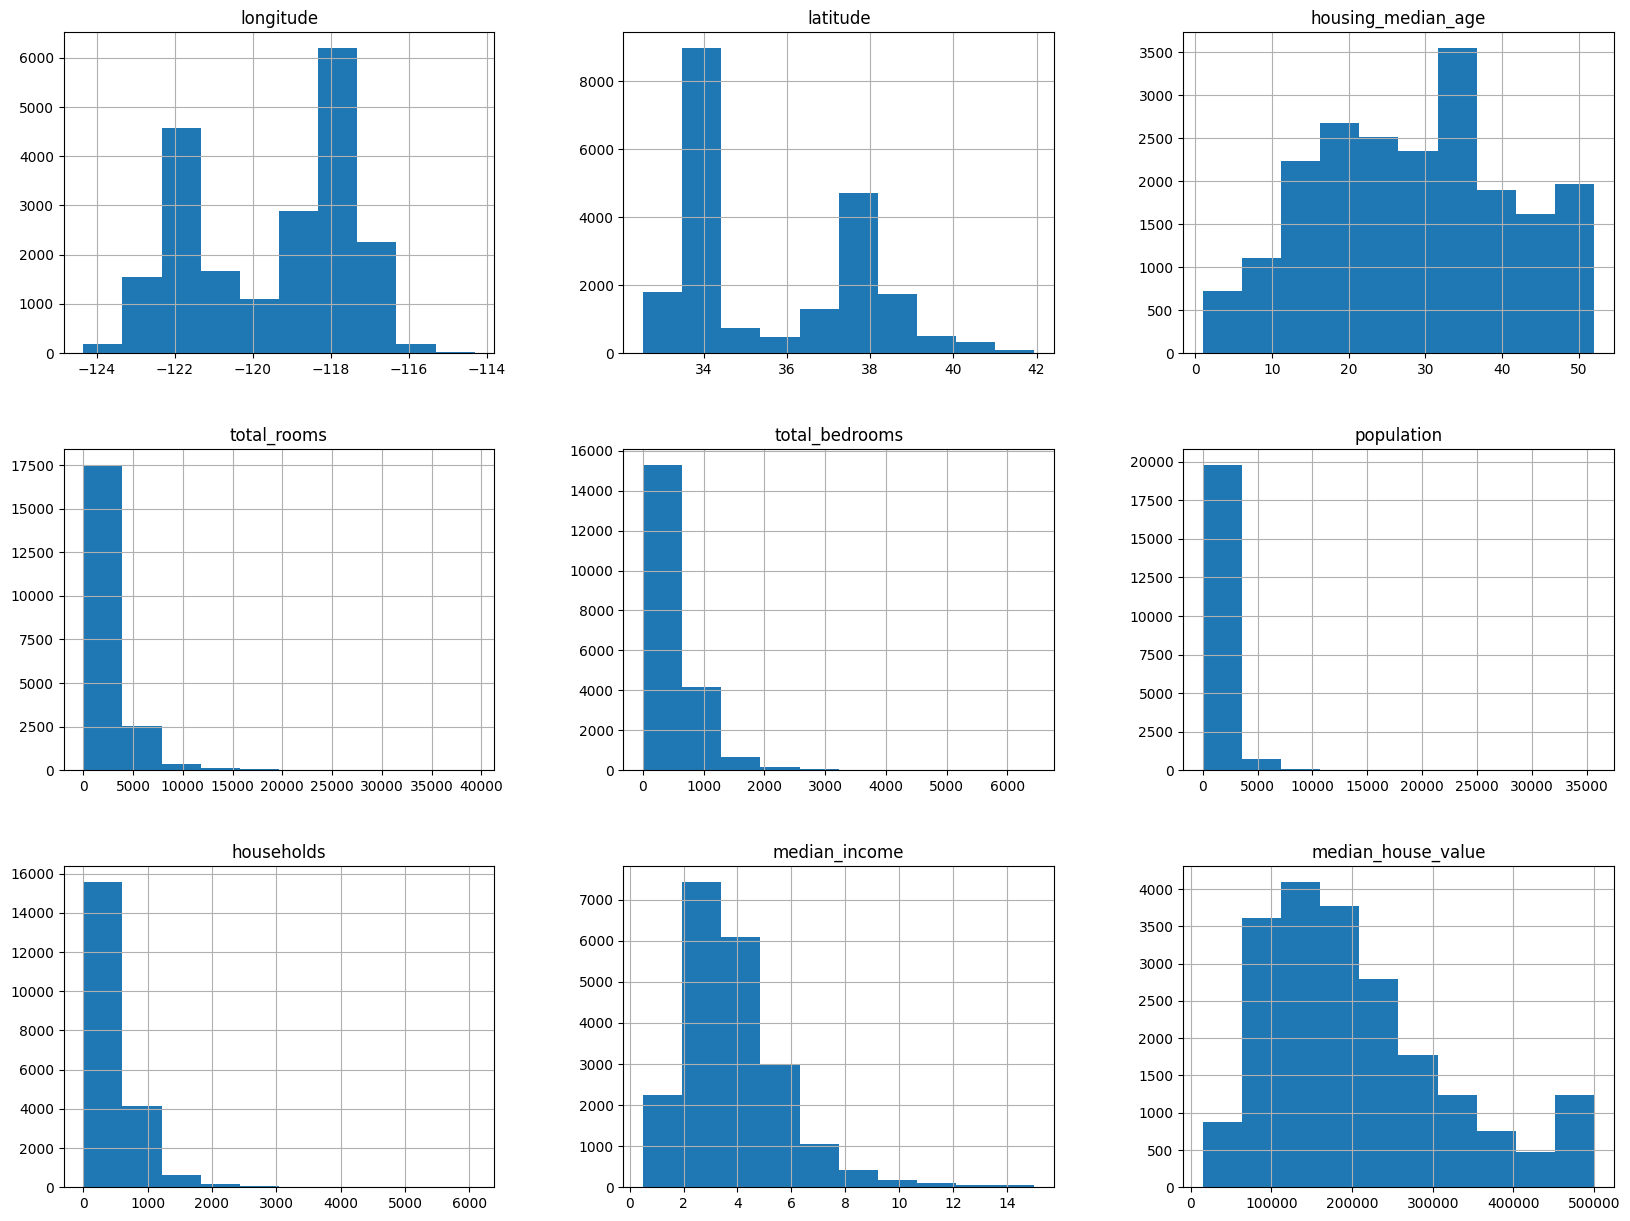

In [6]:
# Utilizamos el método 'hist()' de 'pandas' para visualizar un histograma de todas las columnas del DataFrame 'housing', con un tamaño de figura de 20x15
housing.hist(figsize=(20, 15))

<Axes: xlabel='longitude', ylabel='latitude'>

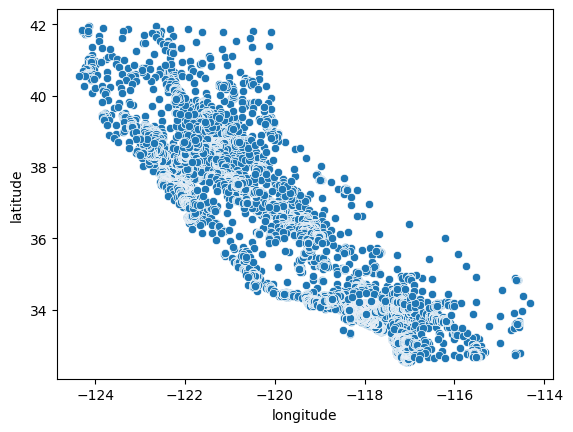

In [8]:
# Usamos la librería 'seaborn' para visualizar un 'scatterplot' (gráfico de dispersión) de las columnas 'longitude' y 'latitude' de las viviendas en California (DataFrame 'housing')

sns.scatterplot(x='longitude', y='latitude', data=housing)

<Axes: xlabel='longitude', ylabel='latitude'>

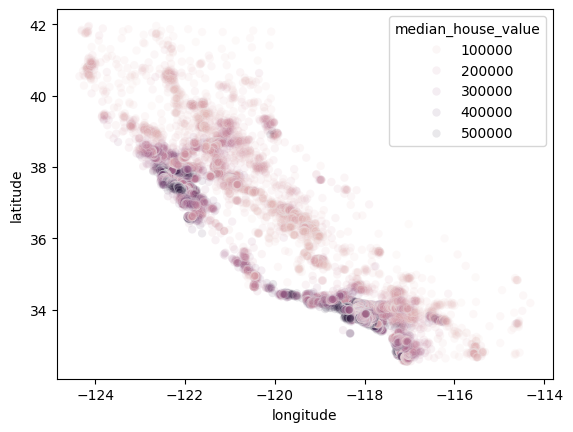

In [9]:
# Usamos la librería 'seaborn' para visualizar un 'scatterplot' (gráfico de dispersión) de las columnas 'longitude' y 'latitude' de las viviendas en California (DataFrame 'housing')
# Usamos el parámetro de opacidad 'alpha' de 0.1. Esto significa que los puntos tendrán una opacidad del 10%. Esto es útil cuando tenemos muchos puntos y queremos visualizar la densidad
# Usamos el parámetro 'hue' para agregar una dimensión adicional a la trama al colorear los puntos de datos según la variable 'median_house_value'
sns.scatterplot(x='longitude', y='latitude', data=housing, alpha=0.1, hue='median_house_value')

<Axes: xlabel='longitude', ylabel='latitude'>

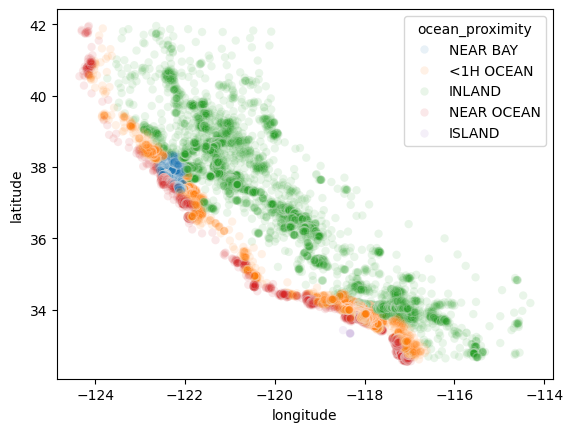

In [12]:
# Usamos la librería 'seaborn' para visualizar un 'scatterplot' (gráfico de dispersión) de las columnas 'longitude' y 'latitude' de las viviendas en California, con la intensidad del color representando la proximidad al océano
sns.scatterplot(x='longitude', y='latitude', data=housing, alpha=0.1, hue='ocean_proximity')

### **Fase III:** Correlación y perfilado de datos con [ydata_profiling](https://docs.profiling.ydata.ai/latest/)

In [15]:
# Instala la librería 'ydata_profiling' (Pandas Profiling) en el ambiente de desarrollo
!pip install ydata_profiling

# Importa la clase 'ProfileReport' desde 'ydata_profiling'
from ydata_profiling import ProfileReport

# Utiliza Pandas Profiler para generar un informe de perfilado de datos del DataFrame 'housing'
profile = ProfileReport(housing, title='Reporte Perfilamiento de Datos', explorative=True)
profile.to_notebook_iframe()

# Opcional: Para generar un informe de perfilamiento de datos en formato HTML, utiliza el método 'to_file()' de la clase 'ProfileReport'
# profile.to_file("reporte_perfilamiento_datos.html")

  Using cached ydata_profiling-4.16.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached matplotlib-3.10.0-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached phik-0.12.5-cp310-cp310-win_amd64.whl.metadata (5.6 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached wordcloud-1.9.4-cp310-cp310-win_amd64.whl.metadata (3.5 kB)
Using cached ydata_profiling-4.16.1-py2.py3-none-any.whl (400 kB)
Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
Using cached matplotlib-3.10.0-cp310-cp310-win_amd64.whl (8.0 MB)
Using cached phik-0.12.5-cp310-cp310-win_amd64.whl (674 kB)
Using cached wordcloud-1.9.4-cp310-cp310-win_amd64.whl (299 kB)

   ---------------------------------------- 0/5 [matplotlib]



ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'D:\\Archivos de Usuario\\Documents\\Artificial-Intelligence\\ai_env\\Lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp310-win_amd64.pyd'
Check the permissions.



ModuleNotFoundError: No module named 'ydata_profiling'